<a href="https://colab.research.google.com/github/sayan0506/Deep-Neural-Network-with-Pytorch-/blob/main/Pytorch_for_Deep_Learning_Course(Img_Classification_using_logistic_reg).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification using pytorch
In this module we will use logistic regression for image classifcation using MNIST dataset for classifying digits

In [1]:
import torch
# torchvision is the module that contains some utilities to work with image data in pytorch
import torchvision
# torchvision has standard dataset MNIST 
from torchvision.datasets import MNIST 

In [2]:
# this is classsification problem
# as we are trying to classify what category of data the input falls into
data = MNIST(root = '/content/data', download = True)
# when we pass download = True it tells to the class thta, if the data is not present in the root folder passed
# then, download it else don't download
# from folder we can see train_data downloaded as train gz file, similarly train, test img an labels are downloaded  

Extracting /content/data/MNIST/raw/train-images-idx3-ubyte.gz to /content/data/MNIST/raw


Extracting /content/data/MNIST/raw/train-labels-idx1-ubyte.gz to /content/data/MNIST/raw



Extracting /content/data/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/data/MNIST/raw


Extracting /content/data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:
len(data)

60000

In [4]:
# let's download test images
test_dataset = MNIST(root = '/content/data', download = True, train=False)

In [5]:
# let us look sample images fom train set
data[0]
# each element of data contains the PIL.image.image(PIL = Python Imaging Library)
# and the label of the image
# each image of the shape (28, 28)

(<PIL.Image.Image image mode=L size=28x28 at 0x7F03D660F198>, 5)

In [6]:
import matplotlib.pyplot as plt


5


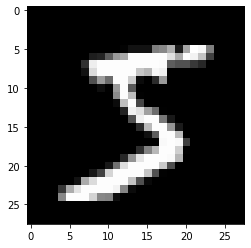

In [7]:
# now visualize the images and labels from dataset
image, label = data[0]
plt.imshow(image, cmap = 'gray')
print(label)

In [8]:
# we need to convert images with tensors, so that pytorch can work with those
import torchvision.transforms as transform

In [9]:
# so while loading images we will aply the transform
from torchvision.datasets import MNIST

In [10]:
# loading the datasets with transform
dataset = MNIST(root = '/content/data/MNIST_T',train = True, transform = transform.ToTensor(), download = True)

Extracting /content/data/MNIST_T/MNIST/raw/train-images-idx3-ubyte.gz to /content/data/MNIST_T/MNIST/raw


Extracting /content/data/MNIST_T/MNIST/raw/train-labels-idx1-ubyte.gz to /content/data/MNIST_T/MNIST/raw


Extracting /content/data/MNIST_T/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/data/MNIST_T/MNIST/raw





Extracting /content/data/MNIST_T/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/data/MNIST_T/MNIST/raw
Processing...
Done!


In [11]:
print(type(dataset[0][1]))
print(type(dataset[0][0]))

<class 'int'>
<class 'torch.Tensor'>


In [12]:
# so whenever the MNIST is instantiated. dataset consists of list of 60,000 images, and 
# each element consists of image tensor, and int i.e image label
img_tensor, label = dataset[0]
print(img_tensor.shape)
# here 1st dimension is the channel size, nh = 28, nw = 28 


torch.Size([1, 28, 28])


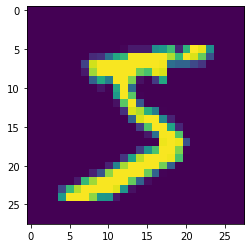

In [13]:
# let's look an image sample
plt.imshow(img_tensor.reshape(28,28))

# Training and Validation set

In [17]:
# let us split the dataset into train and validation set
import numpy as np

# split indics takes length of dataset and validation percentage attribute
def split_indices(n, val_pct):

  # determind size of validation set
  n_val = int(val_pct * n)
  # create random permutation between 0 to n-1
  indxs = np.random.permutation(n)
  # now split indices
  # pichk 1st n_val for validation set
  return indxs[n_val:], indxs[:n_val]

In [26]:
# we finally get indices corresponds to train and validation splits
split_indices(len(dataset), 0.10)

(array([ 8967, 53844, 55793, ..., 13991,  2496, 43776]),
 array([21787, 51163, 10645, ..., 49471, 47109, 40132]))

In [28]:
train_indices, validation_indices = split_indices(len(dataset), val_pct = 0.2)

In [29]:
# size of train and validation set
print(len(train_indices), len(validation_indices))

48000 12000


In [30]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [31]:
batch_size = 100

# Samples elements randomly from a given list of indices, without replacement
# subsequent random sapler ensures that, sampling wil be done based on indices passed in the train_samples 
# training sampler and dataloader
train_sampler = SubsetRandomSampler(train_indices)
train_dl = DataLoader(dataset, batch_size= batch_size, sampler = train_sampler)

# validation sampler and dataloader
validation_sampler = SubsetRandomSampler(validation_indices)
validation_dl = DataLoader(dataset, batch_size= batch_size, sampler = train_sampler)

In [38]:
# so. the train_dl consist of 480 mini batches of data
print(len(train_dl))
print(len(validation_dl))

480
480


In [43]:
# the above described procedure can simply donw by single line of code random_Split
from torch.utils.data import random_split

In [48]:
validation_pct = 0.2
batch_size = 128
# in random_split we pass the dataset, then pass the train and validation set lengths as a list of two elements 
train_ds, validation_ds = random_split(dataset, [int(len(dataset)*(1-validation_pct)), int(len(dataset)*validation_pct)])

In [49]:
from torch.utils.data.dataloader import DataLoader

# now we create dataloaders using the dataset
train_dl = DataLoader(train_ds, shuffle = True)
validation_dl = DataLoader(validation_ds, shuffle = True)
